### Project Description:
#### With the explosion in fitness tracker popularity, runners all of the world are collecting data with gadgets (smartphones, watches, etc.) to keep themselves motivated. They look for answers to questions like:
#### How fast, long, and intense was my run today?<br> Have I succeeded with my training goals? <br> Am I progressing? <br> What were my best achievements?<br>  How do I perform compared to others?<br>
#### I exported seven years worth of the training data from Runkeeper. The data is a CSV file where each row is a single training activity. In this project, I'll create import, clean, and analyze my data to answer the above questions.

###    1.) Let's obtain and review the raw data

In [7]:
#importing necesaary libraries
import pandas as pd

In [8]:
#define the file containing dataset
runkeeper_file = ("C:/Users/SATVIK/Downloads/cardioActivities.csv")

In [9]:
#as by default, date columns are represented as 'object' when loading a csv file using the default read_csv()
#and to read the date column correctly, we can use argument parse_dates to specify a list of date columns
#also in order to access any data point across the dataframe, it's important to specify the index(rows indices)

#so, creating dataframe with parse_dates and index_col parameters
df_activities = pd.read_csv(runkeeper_file, parse_dates=['Date'], index_col='Date')

In [10]:
#let's have a glance of the imported data (a sample of 3 rows)
display(df_activities.sample(3))

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2017-05-30 18:19:20,58569994-61c8-400c-a647-114e161ff8df,Running,NaN,8.42,42:48,5:05,11.80,584.0,85,154.0,NaN,TomTom MySports Watch,2017-05-30-181920.gpx
2014-09-11 19:10:00,46be3354-011e-4fc3-8b54-3b78e4f9ea2c,Running,NaN,9.61,48:22,5:02,11.93,682.0,54,NaN,NaN,NaN,2014-09-11-191000.gpx
2015-12-21 18:31:25,620a65d8-185f-40f4-8967-9ce068f02269,Running,NaN,10.02,57:55,5:47,10.38,687.0,91,138.0,NaN,TomTom MySports Watch,2015-12-21-183125.gpx


In [11]:
#Let's look at the first 3 rows now
df_activities.head(3)

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx


In [12]:
#Let's summarize the dataframe
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

### 2.) Let's perform Data Preprocessing

In [13]:
#Let's rename some of our columns
df_activities = df_activities.rename(columns={'Type':'Workout_type', 'Distance (km)':'Distance_km'})

In [14]:
df_activities.head(1)

,Activity Id,Workout_type,Route Name,Distance_km,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx


In [15]:
#We'll first remove columns that are'nt useful for our analysis
cols_to_drop = ["Friend's Tagged", "Route Name", "GPX File", "Activity Id", "Calories Burned", "Notes"]
df_activities.drop(cols_to_drop, axis=1, inplace=True)

In [16]:
#Replace 'other' workout type to 'unicycling'
df_activities['Workout_type'] = df_activities['Workout_type'].str.replace('Other', 'Unicycling', regex=False)

In [17]:
#Count of Workout_type activities
display(df_activities.Workout_type.value_counts())

#Count the missing values of each column
df_activities.isnull().sum(axis=0)

Running       459
Cycling        29
Walking        18
Unicycling      2
Name: Workout_type, dtype: int64

Workout_type                  0
Distance_km                   0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

### 3.) Let's deal with the missing values

#### It can be noticed that there are 214 missing values for Average Heart Rate (bpm) column
#### What could be the potential reasons for this?
#### Depends; for heart rate info, maybe the cardio sensor wasn't always used
##### (for notes and route, as it's optional so could have been left blank most of the times
##### for friend's tagged column, well it's obvious why its left blank LOL!)
#### Now, I can't go back in time and get that data, but what best I can do is fill in those values with the average value.
#### This process is  MEAN IMPUTATION.
#### But while imputing the mean to fill in missing data, we need to consider that average heart rate varies for different activities
#### i.e. walking, running etc.

#### So, I'll filter the Dataframe by Workout_type and calculate Mean Heart Rate for each type.


In [18]:
#Calculate sample Mean of Heart Rate for each type
avg_HR_Run = df_activities[df_activities['Workout_type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_HR_Cycle = df_activities[df_activities['Workout_type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

In [19]:
#Now splitting whole dataframe into several, specific for different activities
df_Run = df_activities[df_activities['Workout_type'] == 'Running'].copy()
df_Walk = df_activities[df_activities['Workout_type'] == 'Walking'].copy()
df_Cycle = df_activities[df_activities['Workout_type'] == 'Cycling'].copy()

In [20]:
#Filling the missing values with counted mean
df_Run['Average Heart Rate (bpm)'].fillna(int(avg_HR_Run), inplace=True)
df_Walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_Cycle['Average Heart Rate (bpm)'].fillna(int(avg_HR_Cycle), inplace=True)

In [21]:
#Count of the missing values in each column in running data
df_Run.isnull().sum()

Workout_type                0
Distance_km                 0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

### 4.) Now I'll plot the running data
#### I'll create the first plot. As I found earlier, 459 activities in data are running and 29,18,2 for Cycling, Walking, Unicycling respectively
#### So I'll focus on plotting different running metrics.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(action = 'ignore', module = 'matplotlib.figure', category = UserWarning, message = 'This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')

In [23]:
#df_activities = df_activities.sort_index()
runs_subset_2013_to_2018 = df_Run['2013':'2018']

C:\Users\SATVIK\AppData\Local\Temp\ipykernel_23712\1951937288.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2013_to_2018 = df_Run['2013':'2018']


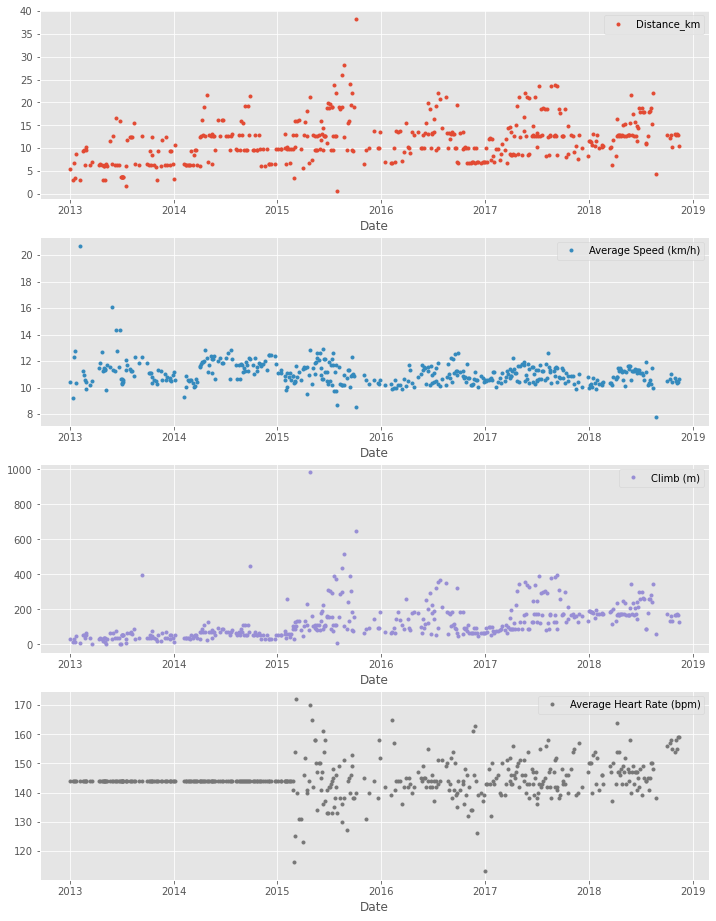

In [24]:
#Create, plot, customize all together
runs_subset_2013_to_2018.plot(subplots=True, sharex=False, figsize=(12,16), linestyle='none', marker='o', markersize=3)
plt.show()

### 5.) Running Statistics <br>

#### No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. <br>

#### You'll know you're with a group of runners if you commonly hear questions like:<br>

#### at is your average distance?<br>
#### How fast do you run?<br>
#### Do you measure your heart rate?<br>
#### How often do you train?<br>

#### I'll find the answers to these questions in my data. It can be observed in plots (Task 4),  the answer to, Do you measure your heart rate? Before 2015: no. To look at the averages, l'll only use the data from 2015 through 2018.

In [25]:
#Now I'll group the time series data by sampling period and apply several methods to each sampling period i.e. annually & weekly
runs_subset_2015_to_2018 = df_Run[(df_Run.index <= '2019') & (df_Run.index >= '2015')]
runs_subset_2015_to_2018.head()

,Workout_type,Distance_km,Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [26]:
#Running data for last 4 years
#runs_subset_2015_to_2018 = df_Run['2018':'2015']
#print(runs_subset_2015_to_2018)

In [27]:
#Annual Statistics
print('This is how my average run looks in the last 4 years:')
display(runs_subset_2015_to_2018.resample('A').mean())

This is how my average run looks in the last 4 years:


,Distance_km,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


In [28]:
#Weekly Statistics
print('This is weekly averages of the last 4 years:')
display(runs_subset_2015_to_2018.resample('W').mean().mean())

This is weekly averages of the last 4 years:


Distance_km                  12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

In [29]:
#Mean Weekly counts
weekly_counts_average = runs_subset_2015_to_2018['Distance_km'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How many trainings per week I had on average: 1.5


### 6.) Visualization with Averages<br>
#### Now I'll plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, I'll use the data from 2015 through 2018.<br>

#### In this task, I'll will use matplotlib functionality for plot creation and customization.<br>

In [30]:
#Data preparation
runs_subset_2015_to_2018
runs_distance = runs_subset_2015_to_2018['Distance_km']
runs_hr = runs_subset_2015_to_2018['Average Heart Rate (bpm)']

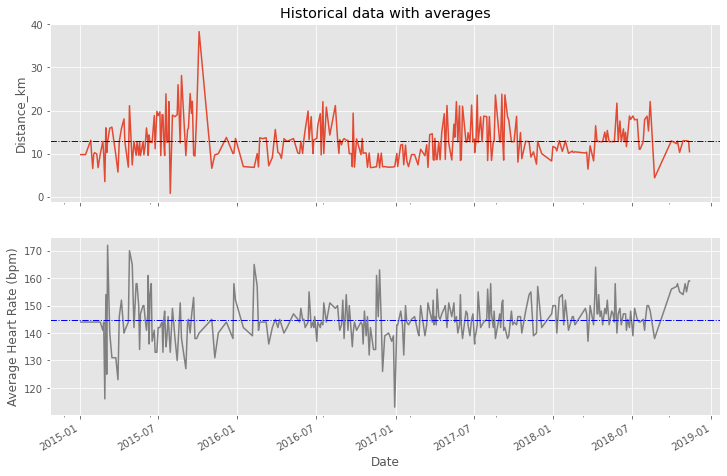

In [31]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

#customize first plot
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance_km', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

#customize second plot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

plt.show()

### 7.) Did I reach my Goals? <br>
#### To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.

In [32]:
#Data preparation
df_run_dist_annual = runs_subset_2013_to_2018['Distance_km'].resample('A').sum()

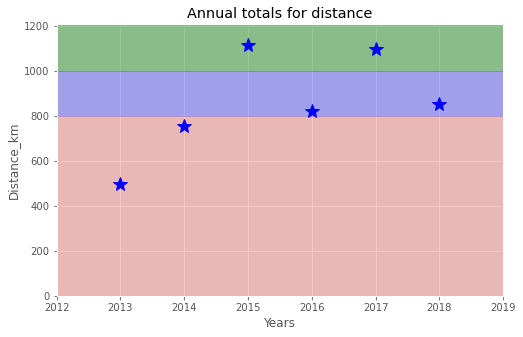

In [33]:
fig = plt.figure(figsize=(8,5))

ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], xlim=['2012','2019'], ylabel='Distance_km', xlabel='Years', title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='blue', alpha=0.3)
ax.axhspan(0, 800, color = 'red', alpha=0.2)

plt.show()

### 8.) Am I progressing? <br>
#### To answer this question, I'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.

In [34]:
import statsmodels.api as sm

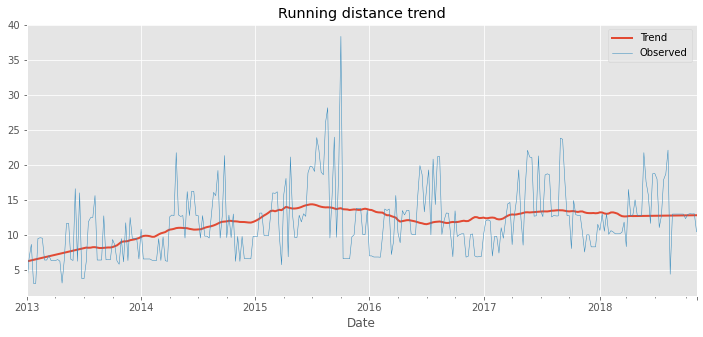

In [35]:
#Data preparation
df_run_dist_weekly = runs_subset_2013_to_2018['Distance_km'].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_weekly, extrapolate_trend=1)

fig = plt.figure(figsize=(12, 5))

ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

plt.show()

### 9.) Training Intensity<br>
#### Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.<br>
#### I'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones.

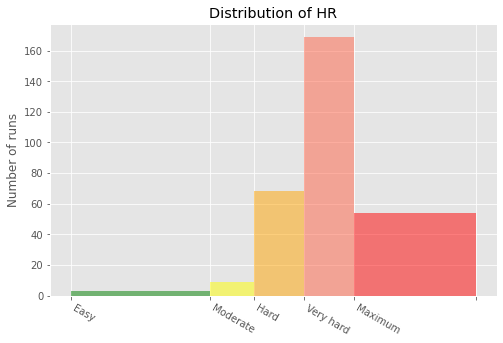

In [50]:
#Data preparation
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximum', '']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = runs_subset_2015_to_2018.loc[:,['Average Heart Rate (bpm)']]

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)

ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')


plt.show()

### 10.) Detailed summary report
#### With all this data cleaning, analysis, and visualization, I'll create detailed summary tables of my training.
#### To do this, I'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.

In [65]:
# Concatenating three DataFrames
df_run_walk_cycle = pd.concat([df_Run, df_Cycle, df_Walk]).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance_km', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Workout_type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

Totals for different training types:


,Distance_km,Climb (m)
Workout_type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


In [64]:
# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Workout_type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack()

Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance_km
Workout_type                                                       
Cycling      25%               16.980000    139.000000    15.530000
             50%               19.500000    199.000000    20.300000
             75%               21.490000    318.000000    29.400000
             count             29.000000     29.000000    29.000000
             max               24.330000    553.000000    49.180000
             mean              19.125172    240.551724    23.468276
             min               11.380000     58.000000    11.410000
             std                3.257100    128.960289     9.451040
             total                   NaN   6976.000000   680.580000
Running      25%               10.495000     54.000000     7.415000
             50%               10.980000     91.000000    10.810000
             75%               11.520000    171.000000    13.190000
             count            459.000000    459.000000   459.000000
             max               20.720000    982.000000    38.320000
             mean              11.056296    124.788671    11.382353
             min                5.770000      0.000000     0.760000
             std                0.953273    103.382177     4.937853
             total                   NaN  57278.000000  5224.500000
Walking      25%                5.555000      7.000000     1.385000
             50%                5.970000     10.000000     1.485000
             75%                6.512500     15.500000     1.787500
             count             18.000000     18.000000    18.000000
             max                6.910000    112.000000     4.290000
             mean               5.549444     19.388889     1.858333
             min                1.040000      5.000000     1.220000
             std                1.459309     27.110100     0.880055
             total                   NaN    349.000000    33.450000

### 11.) Fun facts
#### To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.
#### These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.

In [92]:
df_Run.head()

,Workout_type,Distance_km,Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [88]:
Average_Distance_Run = df_Run['Distance_km'].mean()
print(str(round(Average_Distance_Run, 2)) + ' km')

11.38 km


In [89]:
Longest_Distance_Run = df_Run['Distance_km'].max()
print(str(Longest_Distance_Run) + ' km')

38.32 km


In [91]:
Total_Distance_Run = df_Run['Distance_km'].sum()
print(str(Total_Distance_Run) + ' km')

5224.5 km


In [97]:
Total_Runs = df_Run.shape[0]
print('Total Runs: ', Total_Runs)

Total Runs:  459


Let's say I used 5 pair of shoes to achieve my Total_Distance_Run of 5224.5 km in all these years.<br>
Suppose If tomorrow I make up my mind to run all around the earth's circumference, how many pair of shoes would i require?

In [101]:
Average_km_per_shoes = Total_Distance_Run/5
#Assuming earth's circumference as 40,075 Km
Shoes_for_earth_tour = int(40075/Average_km_per_shoes)

print('Satvik would need {} pairs of shoes to run around the Earth!'.format(Shoes_for_earth_tour))

Satvik would need 38 pairs of shoes to run around the Earth!


## THANK YOU!